<a href="https://colab.research.google.com/github/chakrikaanousha/Predicting_House_Prices-Regression_using_TensorFlow/blob/main/Predicting_House_Prices_with_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting House Prices with Regression

# Evaluting price of Houses by using following features:


---




1.   Year of sale of the House
2.   The age of the house at the time of sale
3.   Distance from city center
4.  Number of stores in the locality
5.  The latitude
6.  The longitude



 ## **Importing Libraries**

In [ ]:
!pip install utils
from utils import *
print("importing necessary libraries")

importing necessary libraries


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

print(tf.__version__)

2.12.0


## Importing the data:


---


dataset : data.csv

Using Pandas Library to read the data,
Pandas is a data analysis and data manipulation library.

In [9]:
import pandas as pd
#setting the column names
names = ['serial', 'date', 'age', 'distance', 'stores','latitude', 'longitude','price']
#from pandas using read_csv function which returns a data frame
df=pd.read_csv("data.csv", names= names )
#to check the datset
df.head()#returns 5 rows from dataset


,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


**Checking the Missing data:**


---



using the function isna we check for any possible missing data, as data is large we return it in the form of sum:

that is summing up all the isna values

In [10]:
df.isna().sum() #isan return either true or false for each column + sum (as the number of columns are more we prefer taking the total as a whole)

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

## Data Normalization:


---



by Normalizing the data, it becomes easier for the Optimization Technique(GradientDescent) to calculate the minimas

normalise data of different features in order obtain the values in a certian range

Here, we are using Zscore Normalization:

Normalized x = x-mean(x)/standardDeviation(x)

range: -1 to 1


In [11]:
#serial row is not needed:
#syntax: iloc[rows,column] - removing the 1stcolumn(i.e index=0)
          # : here specifies all rows
          # 1: from i=1 to all columns are being selected
df=df.iloc[:,1:]
df_norm = (df-df.mean())/df.std() #for every value it's calculated - By PandasLib process simp
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


**Convert Label Value**

---



as we have converted the whole data set values into normalised values, so the prediction/ output of the trained value will be normalised prize values,

therefore we have to convert the normalised predicted values back to orginal values:

In [ ]:
#df['x'] - selecting specified row i.e x, here
#calculating mean and S.D
y_mean =df['price'].mean()
y_std= df['price'].std()

def convert_label_value(pred):
    return int(pred*y_std+y_mean) #REVERSING: normalised values to original values

print(convert_label_value(0.35008)) #checking the values

14263


## Creating Training and Testing Sets:


---

Here, **input features are:**


1.   Year of sale of the House
2.   The age of the house at the time of sale
3.   Distance from city center
4.  Number of stores in the locality
5.  The latitude
6.  The longitude

**Expected Output:**

Price of the House





**Select Features**:



---
From the set remove the Price column as its the oputput that has to be predicted:


In [13]:
#from the normalised data, eleted the price column
#select all the rows and columns expect the prize
x=df_norm.iloc[:,:6]
#print those values out
x.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [14]:
#store the prices(Expected outputs) into a new variable
y=df_norm.iloc[:,-1] #columns -1 : only last column
y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

In [15]:
#required only values as inputs -  using numpy arrays
#accesing by using numpy (.values function)
x_arr=x.values
y_arr=y.values

print( x_arr.shape)
print( y_arr.shape)

#explaination about output:
#(5000, 6) - 5000 examples of 6 features

(5000, 6)
(5000,)


**Training and Testing Set**

---



Dividing the data into 2 sets:

1. Trianing Set - on which the model is trained on

2. Testing Set - on which the model is tested


In [16]:
#Training: 5000 examples
#training: x_train and y_train - 4750 exampels
#testing: x_test and y_test - 250 examples

#test size = 0.5 : which means only 5% data is used for testing

x_train, x_test, y_train, y_test = train_test_split(x_arr, y_arr, test_size=0.05, random_state =0)
print( x_train.shape, y_train.shape)
print(y_test.shape, y_test.shape)

(4750, 6) (4750,)
(250,) (250,)


## Create the Model:



In [19]:
def get_model():
#considering, 3layers + ReLu Activationfxn
#using Squential from Keras:
    model = Sequential([
        #Layer 1 : Dense , no.of nodes = 10, inputfeatures = 6, activationfxn - rectified Linear Unit
        Dense(10, input_shape=(6,), activation ='relu'),
        #Layer 2 : fully connected Dense Layer
        Dense(20, activation = 'relu'),
        #Hidden Layer
        Dense(5, activation = 'relu'),
        #Layer3: Output Layer - as regression prob, activation fxn - not req
        Dense(1)
    ])

    '''Model Summary:
    Its a Fully Connected Network -  its a dense full connected network:
    to calculate the parameters -
    Multiply no.of nodes with preceeding layers + bias
    ex. dense 2 = 5*20+5 =105'''

    model.compile(
    loss ='mse', #loss function: Mean Square Method
        optimizer = 'adam') #Optimiser - Adam - used for minimising loss funct.
    return model

get_model().summary() # summary -  models architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


## Model Training

---



Training Time for the model - not sure?

solution: Early Stopping call back from Keras - if validation loss decreases for few epochs

validation loss - calculated on testing Data

In [26]:
#earlyStopping - call back from keras , wait for (patience) seconds if val loss not changing then stops the training:
es_cb = EarlyStopping(monitor='val_loss', patience =5)

#create  a model using get model function:
model = get_model()
#getting prediction from untrained model
preds_on_untrained=model.predict(x_test)

#model training:
#model.fit- to fit the model on data
#history fxn has info on validationloss on various epochs
history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test), #validation on testing set
    epochs = 100,
    callbacks = [es_cb] #using only one call back
)

8/8 [==============================] - 0s 2ms/step
Epoch 1/100
149/149 [==============================] - 1s 3ms/step - loss: 0.6351 - val_loss: 0.3261
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 0.2770 - val_loss: 0.1849
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1976 - val_loss: 0.1604
Epoch 4/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1779 - val_loss: 0.1566
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1705 - val_loss: 0.1474
Epoch 6/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1665 - val_loss: 0.1497
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 0.1640 - val_loss: 0.1459
Epoch 8/100
149/149 [==============================] - 1s 4ms/step - loss: 0.1615 - val_loss: 0.1484
Epoch 9/100
149/149 [==============================] - 0s 3ms/step - loss: 0.1602 - val_loss: 0.1512
Epoch 10/100
149/149 [==================

**plot Training and Validation Loss:**


---
using plot loss function - to compare predictions from the model when its trained and when its untrained


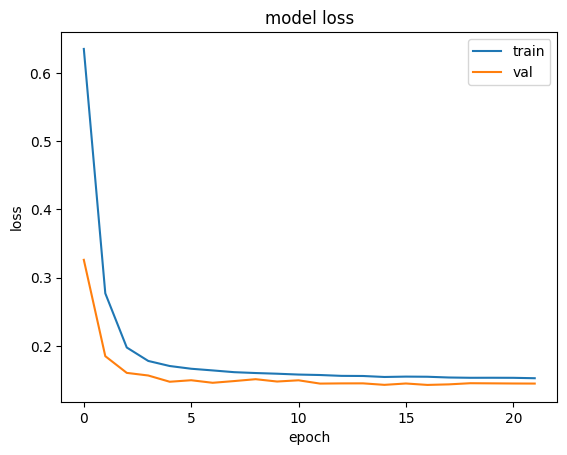

In [31]:
#plot_loss(history) #contains both untrained and trained value set

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

## PREDICTIONS:


**Plot Raw Predictions:**

---



to compare the model before and after prediction

function using: Compare Prediction Helper function

In [40]:
preds_on_trained = model.predict(x_test)

compare_predictions(preds_on_untrained, preds_on_trained, y_test)

8/8 [==============================] - 0s 2ms/step


MSE for preds1: [0.82436943]
MSE for preds2: [0.14477494]
preds2 performs better.


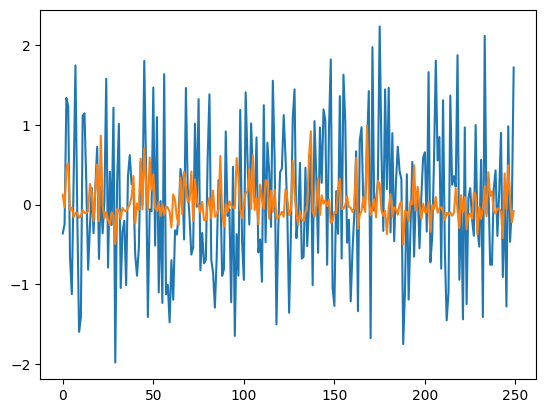

In [41]:
def compare_predictions(preds1, preds2, y_test):
    """
    Compare two sets of predictions with the ground truth labels.

    Args:
        preds1 (list): Predictions from the first model.
        preds2 (list): Predictions from the second model.
        y_test (list): Ground truth labels.

    Returns:
        None
    """
    # Calculate the mean squared error (MSE) for both sets of predictions
    mse1 = sum((pred - true) ** 2 for pred, true in zip(preds1, y_test)) / len(y_test)
    mse2 = sum((pred - true) ** 2 for pred, true in zip(preds2, y_test)) / len(y_test)

    # Print the MSE for each set of predictions
    print("MSE for preds1:", mse1)
    print("MSE for preds2:", mse2)

    # Compare the MSE values and print the model with better performance
    if mse1 < mse2:
        print("preds1 performs better.")
    elif mse1 > mse2:
        print("preds2 performs better.")
    else:
        print("Both sets of predictions have the same performance.")

# Rest of your code
plt.plot(preds_on_trained)
plt.plot(preds_on_untrained)
compare_predictions(preds_on_untrained, preds_on_trained, y_test)
